In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Kinetic Energy
The total kinetic energy of a cross country skiier is non constant over time and depends on the skiiers mass $m$ and his velocity $v$  
$ E(t) = \frac{1}{2} \cdot m \cdot v(t)^2 $

The velocity $v$ is constant, when there is no change in Energy  
$\frac{\partial}{\partial t} E(t) = P(t) = 0$

# Power of a skiier
The net power $P$ by a skiier is the sum of input power $P_{In}$ and the power loss $P_{Out}$  
$P(t) = P_{In}(t) - P_{Out}(t)$

## Air resistance force
The air resistance force results from the attack surface $A$, the medium density $\rho$, the drag coefficient $c_w$ (which depends on the object shape), and the object velocity $v$  
$F_{Air} = \frac{1}{2} \cdot A \cdot c_w \cdot \rho \cdot v^2$

## Downslope force
A slope angle $\alpha$ results in a downslope force  
$F_{\alpha} = F_G \cdot \sin{(\alpha)} = m \cdot g \cdot \sin{(\alpha)}$

## Friction force
Last bat not least: We have a friction force, which results from the normal force $F_N$ and the friction coefficient $\mu_H$ (when standing still) or $\mu_R$ (when moving $v \ne 0$) respectively.  
$F_F = F_N \cdot \mu = F_G \cdot \cos{(\alpha)} \cdot \mu = m \cdot g \cdot \sin{(\alpha)} \cdot \mu$   


In reality it is a bit more complicated:  
An object only starts moving once the net input force $F = F_{In} - F_{Air} - F_{\alpha}$ exceeds the static friction force F_H^{krit}.  
Until then ($v = 0$, $F < F_H^{krit.}$) the friction force asserted is $F_H = - F$.   
Once $F > F_H^{krit.}$, the object starts moving ($v\ne0$) and the friction drops to a constant Force $F_R$.

![](/../docs/friction.png)

In [47]:
# SI Units                
h_norm = 1.75
A_norm = 0.75 # estimated for norm height = 1.75, scale quadratically to height


cw = 1  # drag coefficient, approximated to upright human
rho = 1.2
mu_H = 0.075
mu_R = 0.03

g = 9.81
##############################################33
m = 70 


h = 1.8 # Height of skiier
A = A_norm * (h/h_norm)**2



In [48]:
f = 10 # Sampling frequenc of movement parameters
dt = 1/f

In [49]:
# Modeling double poling
f_push = 1 # Push frequency in Hz

# Measurements needed: Push duty cycle (how much time of a push is actually pushing and how much of it is just bringing the sticks back) increases with higher frequency
# Low pushing frequency: Harder pushes with a lot of retraction time in between

def duty_cycle(frequency):
    # Linear function:
    # duty_cycle = m * frequency + b
    m1 = [0.4, 0.5]     # [duty_cycle, frequency]
    m2 = [0.6, 1]       # 

    m = (m1[0]-m2[0])/(m1[1]-m2[1])

In [50]:

def downslope_force(alpha, mass=m, g=g):
    return mass * g * np.sin(alpha)

def air_resistance_force(v, A=A, cw=cw, rho=rho):
    return 1/2 * A * cw * rho * v**2

def friction_force(mu, alpha, mass=m, g=g):
    return mass * g * np.cos(alpha) * mu

def power_from_force(F, v):
    return F*v

def work_from_power(P, dt):
    return P*dt

def kinetic_energy_from_velocity(v, mass=m):
    return 1/2 * mass * v**2

def velocity_from_kinetic_energy(E, mass=m):
    return np.sqrt(E*2/mass)



# Maybe take poleforce from:
https://journals.plos.org/plosone/article/file?id=10.1371/journal.pone.0212500&type=printable

Average Power: 92.0237602477652


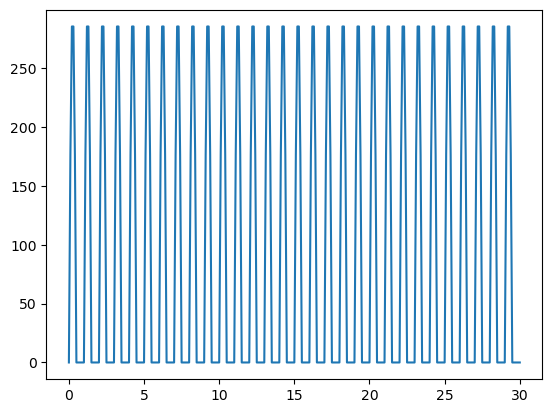

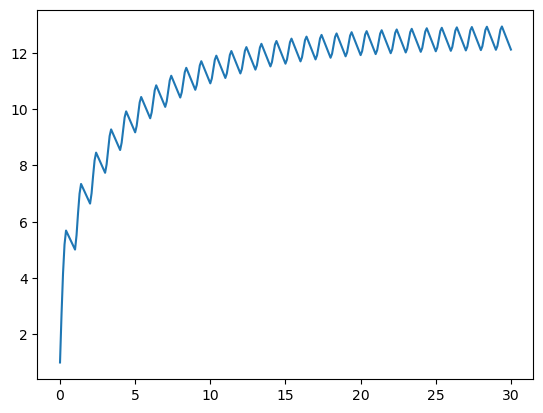

In [56]:
v0 = 1/3.6
P_in = 300
dt = 0.1

tend = 30 # Simulation length

n = int(tend/dt)

v = [v0]

v = np.zeros(n+1)
v[0] = v0
E = np.zeros(n+1)
E[0]= kinetic_energy_from_velocity(v[0])
t = np.linspace(0, tend, n+1)
power = P_in * np.sin(2*np.pi*t)
power[power<0] = 0
P_avg = np.average(power)

plt.figure()
plt.plot(t, power)

alpha = 0
for i in range(n):
    F_air = air_resistance_force(v[i])
    F_downslope = downslope_force(alpha)
    
    F_friction_dynamic = friction_force(mu_R, alpha)
    P = power_from_force(F_air + F_downslope + F_friction_dynamic, v[i])
    P_net = power[i+1] - P
    W_net = work_from_power(P_net, dt)
    E_new = E[i] + W_net
    v_new = velocity_from_kinetic_energy(E_new)
    E[i+1] = E_new
    v[i+1] = v_new

print("Average Power:", P_avg)
plt.figure()
plt.plot(t, v*3.6)
